<h1 align="center"><font color="yellow">Linear Regression with PyTorch</font></h1>

<font color="yellow">Data Scientist.: PhD.Eddy Giusepe Chirinos Isidro</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
x_data = np.array([1, 2, 3, 4, 5])
y_data = x_data * 2


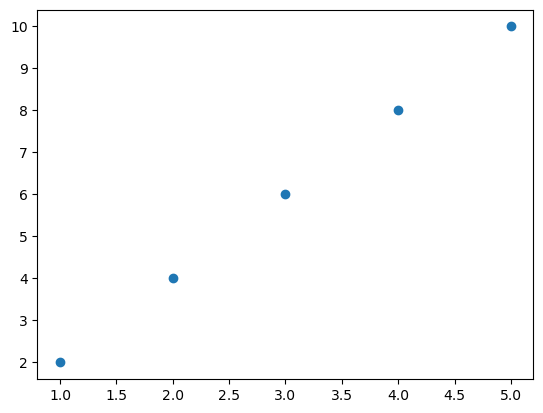

In [5]:
plt.scatter(x_data, y_data)
plt.show()

Criamos uma função de propagação direta a partir da seguinte fórmula: $y = mx + b~~$ ou $~~y = x w + b$.

In [6]:
def forward(x, w, b=0):
    y_hat = x*w + b
    return y_hat


Criamos uma função de Erro quadrático para o cálculo posterior do erro quadrático médio que é calculado como: $\sum_{i=1}^{n}(\hat{y}_i - y_i)^2$.


In [7]:
def loss(y_hat, y):
    return (y_hat - y)**2


Iteramos para `w` que vá de $0$ a $4$ com passo de $0.1$ e calcule a perda dependendo do $\hat{y}$ que obtivemos fazendo a propagação para frente (`Forward propagation`). Guardamos todos os `losses` e `w` para plotagens posteriores.

In [9]:
all_w = []
all_loss = []

for w in np.arange(0, 4, 0.1):
  l_sum = 0

  for i in range(len(x_data)):
    y_hat = forward(x_data[i], w)
    l = loss(y_hat, y_data[i])

    l_sum += l
  
  all_w.append(w)
  all_loss.append(l_sum / len(y_data))
  

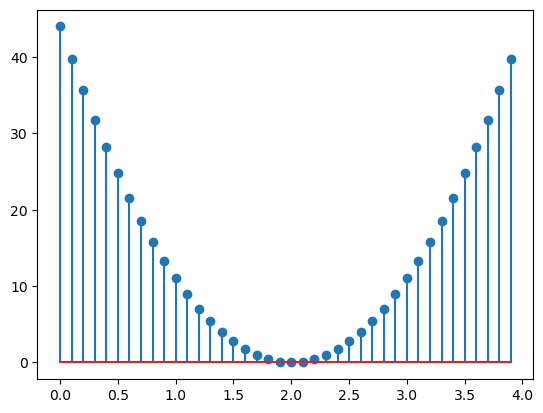

In [11]:
plt.stem(all_w, all_loss)
plt.show()


Criando tensores a partir dos dados que criamos e remodelando-os para serem `(-1, 1)`.

In [12]:
x_torch = torch.FloatTensor(x_data).reshape(-1, 1)

y_torch = torch.FloatTensor(y_data).reshape(-1, 1)

In [13]:
x_torch

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.]])

In [14]:
y_torch

tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.]])

Defina o peso, `w`, como `5` e o viés, `b`, como `3` e defina a opção `requires_grad` como sendo `True` para o cálculo do gradiente automático.


In [15]:
w = torch.tensor(5., requires_grad=True)

b = torch.tensor(3., requires_grad=True)


Defina a taxa de Aprendizado ou Alfa:

In [16]:
lr = 0.05